# OpenQASM 3 and the Qiskit SDK

The Qiskit SDK provides some tools for converting between OpenQASM representations of quantum programs, and the QuantumCircuit class. Note these tools are still in an exploratory phase of development and will continue to evolve as Qiskitâ€™s support for dynamic circuit capabilities expressed by OpenQASM 3 increases.

<Admonition type="note">
This function is still in the exploratory phase.  Therefore, it is likely that the syntax and capabilities will evolve.
</Admonition>

## Import an OpenQASM 3 program into Qiskit

You must install the package `qiskit_qasm3_import ` to use this function. Install using the following command.

```bash
pip install qiskit-qasm3-import
```

Currently two high-level functions are available for importing from OpenQASM 3 into Qiskit. These functions are `load()`, which takes a file name, and `loads()`, which takes the program itself as a string:

```python
import qiskit.qasm3
qiskit.qasm3.load(file_name)
qiskit.qasm3.loads(program_string)
```

In this example, we define a quantum program using OpenQASM 3, and use `loads()` to directly convert it into a QuantumCircuit:

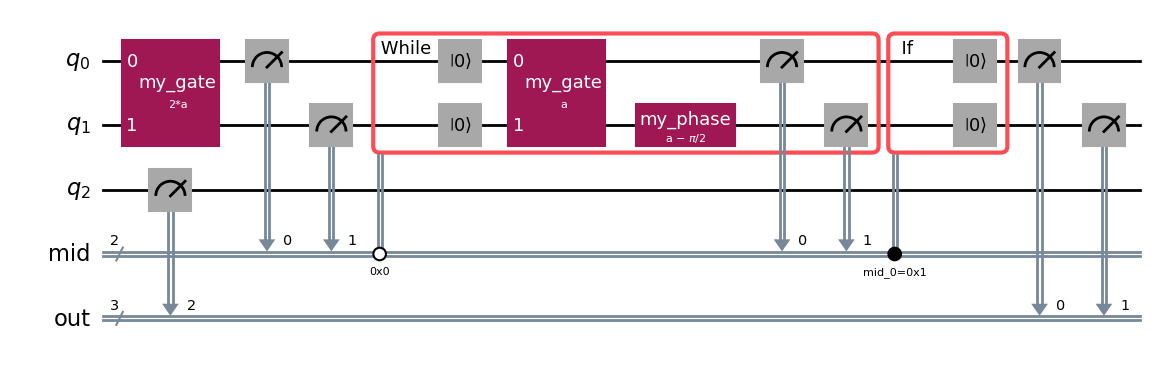

In [3]:
import qiskit.qasm3

program = """
    OPENQASM 3.0;
    include "stdgates.inc";

    input float[64] a;
    qubit[3] q;
    bit[2] mid;
    bit[3] out;

    let aliased = q[0:1];

    gate my_gate(a) c, t {
      gphase(a / 2);
      ry(a) c;
      cx c, t;
    }
    gate my_phase(a) c {
      ctrl @ inv @ gphase(a) c;
    }

    my_gate(a * 2) aliased[0], q[{1, 2}][0];
    measure q[0] -> mid[0];
    measure q[1] -> mid[1];

    while (mid == "00") {
      reset q[0];
      reset q[1];
      my_gate(a) q[0], q[1];
      my_phase(a - pi/2) q[1];
      mid[0] = measure q[0];
      mid[1] = measure q[1];
    }

    if (mid[0]) {
      let inner_alias = q[{0, 1}];
      reset inner_alias;
    }

    out = measure q;
"""
circuit = qiskit.qasm3.loads(program)
circuit.draw("mpl")

## Export to OpenQASM 3

You can export Qiskit code to OpenQASM 3 with `dumps()`, which exports to a string, or `dump()`, which exports to a file.

### Example with `dumps()`

In [4]:
from qiskit import QuantumCircuit
from qiskit.qasm3 import dumps

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

dumps(qc)

'OPENQASM 3.0;\ninclude "stdgates.inc";\nbit[2] meas;\nqubit[2] q;\nh q[0];\ncx q[0], q[1];\nbarrier q[0], q[1];\nmeas[0] = measure q[0];\nmeas[1] = measure q[1];\n'

### Example with `dump()`

In [5]:
from qiskit import QuantumCircuit
from qiskit.qasm3 import dump

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

f = open("my_file.txt", "w")
dump(qc, f)
f.close()

For more information, see the [Exporting to OpenQASM 3](/docs/api/qiskit/qasm3#exporting-to-openqasm-3) section of the API reference.


## Next steps

<Admonition type="tip" title="Recommendations">
    - Learn how to generate OpenQASM code in the [Explore gates and circuits with the Quantum Composer](https://learning.quantum.ibm.com/tutorial/explore-gates-and-circuits-with-the-quantum-composer) tutorial.
    - Review the [OpenQASM 3 Qiskit API](/docs/api/qiskit/qasm3) reference.
    - Visit the [Verify your program](./debugging-tools) topic.
    - Review the [OpenQASM Live Specification](https://openqasm.com/).
</Admonition>